In [84]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## Primeiro passo

É necessario abrir os dados.


Os dados são referetes as notas de estudantes de pos-graduação que foram ou nao aprovados. A ideia é determianr a chance de cada estudante baseado no resultado do mesmo em dois exames.

In [85]:
data = np.loadtxt(os.path.join('Data', 'data1.txt'), delimiter=',')
X, y = data[:,:2], data[:, 2]
print('X:',X[:5])
print('y:',y[:5])

X: [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
y: [0. 0. 0. 1. 1.]


# Vizualização dos dados

Agora podemos vizualizar os dados de uma forma mais ampla.

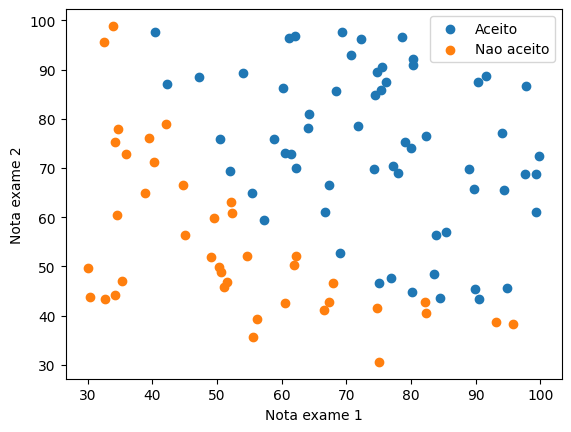

In [86]:
pos = y == 1
neg = y == 0

scatter = plt.scatter(X[pos, 0], X[pos, 1])
scatter = plt.scatter(X[neg, 0], X[neg, 1])
plt.xlabel('Nota exame 1')
plt.ylabel('Nota exame 2')
plt.legend(['Aceito','Nao aceito'])


## Segundo Passo

Podemos então escrever a função custo. Diferente da regressão linear, a hipotese da regressão logistam é definida como:

$$ h\left(\Theta,x\right) = g\left(\Theta^T x\right),$$

onde $g$ é a função sigmóide dada por:

$$g(z) = \frac{1}{1+e^{-z}}.$$



In [87]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)


g( 0 ) =  0.5


## Terceiro passo

Agora podemos implementar a função custo e gradiente. Porém, antes é necessário adicionar o termo de interceptação a $X$, isto é, uma coluna de valores 1.


In [88]:
# COnfigure a matriz X apropriadamente e adicione os termos de interceptação
m, n = X.shape

# Adicione o termo de interceptação
X = np.concatenate([np.ones((m, 1)), X], axis=1)
print('X: ', X[:5])

X:  [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


lembrando que a função custo na regressão logística é dada por

$$ J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h\left(\Theta,x^{(i)}\right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h\left(\Theta,x^{(i)} \right) \right) \right],$$

e que seu gradiente é um vetor com a mesma dimensão do vetor $\Theta$, onde o $j$-ésimo elemento (para $j = 0, 1, \cdots , n$) é dado pela seguinte expressão:

$$ \frac{\partial J\left(\Theta\right)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h\left(\Theta , x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} .$$

Note que por mais que a expressão para o gradiente pareça idêntico ao da regressão linear, ela é diferente, visto que as regressões linear e logística possuem definições diferentes de hipoteses :$h\left(\Theta,x\right)$.
<a id="costFunction"></a>

In [93]:

def costFunction(theta, X, y):
    m = y.size  # Número de amostras de treino
    h = sigmoid(np.dot(X,theta))
    J = (1/m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    
    return J


Theta: [-24.73684959   0.2028365    0.19803678]


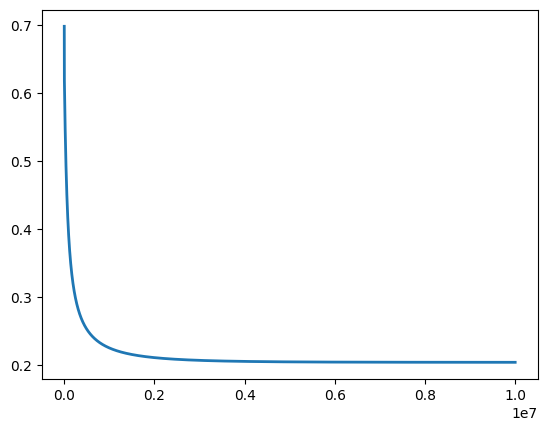

In [96]:
def gradientDescentMulti(X, y, theta, eta, num_iters):
    m = y.shape[0]
    J_history = []

    for _ in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta = theta - eta * (1/m) * (np.dot(X.T, (h - y)))
        
        J = costFunction(theta, X, y)
        J_history.append(J)
    
    return theta, J_history

eta =  1e-3
num_iters = int(1e7)


theta = np.array([0,0,0]) #chute inicial
theta, J_history = gradientDescentMulti(X, y, theta, eta, num_iters)

plt.plot(np.arange(len(J_history)), J_history, lw=2)
print('Theta:',theta)


### Equação da Reta de Decisão

A reta de decisão é a linha que separa as classes. Em termos de regressão logística, a reta de decisão é a linha onde a probabilidade prevista de pertencer a uma das classes é exatamente 0.5. 

Para o nosso classificador de regressão logística, temos

$ h(\mathbf{x}) = \sigma(\theta^T \mathbf{x}) = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2) $

onde:
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ é a função sigmoide.

A reta de decisão ocorre quando a hipótese $h(\mathbf{x})$ é igual a 0.5, ou seja, quando:

$ \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 $

Isolando $x_2$:

$\theta_2 x_2 = -\theta_0 - \theta_1 x_1 $

$ x_2 = \frac{-\theta_0 - \theta_1 x_1}{\theta_2}$

Assim, a equação da reta de decisão no plano $x_1$-$x_2$ é:

$ x_2 = -\big( \frac{\theta_0 + \theta_1 x_1}{\theta_2} \big) $


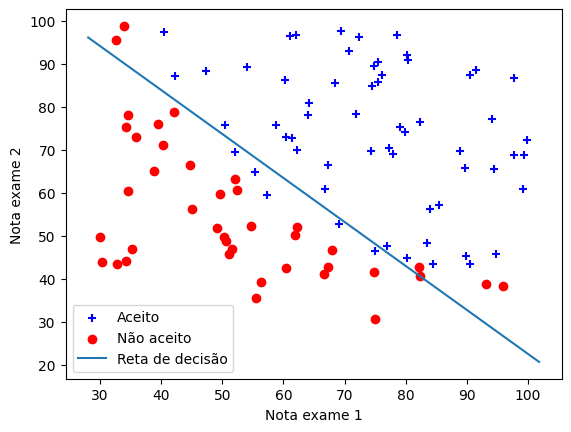

In [97]:
  # Exemplo, substitua com theta otimizado

# Plotando os dados
pos = y == 1
neg = y == 0

plt.scatter(X[pos, 1], X[pos, 2], marker='+', color='blue', label='Aceito')
plt.scatter(X[neg, 1], X[neg, 2], marker='o', color='red', label='Não aceito')

# Gerando a reta de decisão
plot_x = np.array([min(X[:, 1]) - 2, max(X[:, 1]) + 2])
plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])

# Plotando a reta de decisão
plt.plot(plot_x, plot_y, label='Reta de decisão')

# Rótulos e legenda
plt.xlabel('Nota exame 1')
plt.ylabel('Nota exame 2')
plt.legend(loc='best')

Foi fim, podemos comprar nosso modelo ajustado frente ao modelo utilizado a biblioteca módulo `scipy.optimize`.SciPy é uma biblioteca do `python` para cálculos numéricos. Ela oferece um módulo de otimização para encontrar raízes e mínimos de funções. Utilizaremos a funçao para encontar os valores de $\theta$.

In [105]:
# Configura o argumento options para a função optimize.minimize
options= {'maxiter': 400}
initial_theta = np.zeros(n+1)

# Consulte a documentação de optimize.minimize do scipy para a descrição sobre
# de diferentes parâmentros.
# A função retorna um objeto `OptimizeResult`.
# Aqui utilizamos o algoritmo de Newton truncado para o procedimento de otimização
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y), method='TNC')



theta = res.x
print('theta: ', theta)


theta:  [-24.94497826   0.20450266   0.19971972]
